C:\Users\gusti\AppData\Local\Temp\ipykernel_20436\4126556803.py:58: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('lion.jpeg')


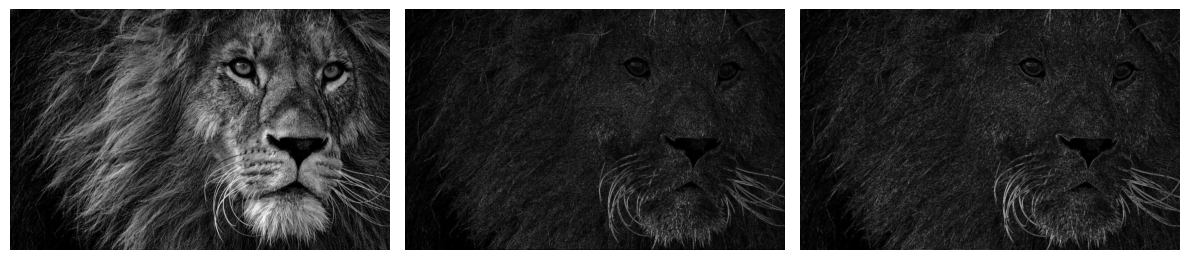

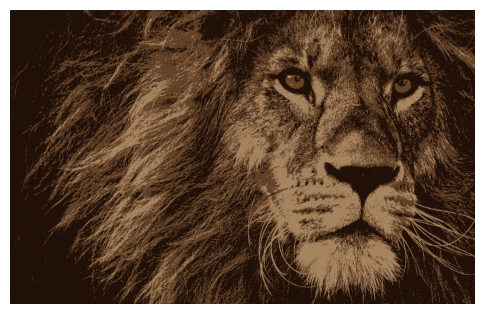

In [3]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def convert_to_grayscale(img):
    if img.ndim == 3:
        return np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
    else:
        return img.astype(float)

def roberts_operator(image):
    G1 = image[:-1, :-1] - image[1:, 1:]
    G2 = image[1:, :-1] - image[:-1, 1:]
    grad = np.sqrt(G1**2 + G2**2)
    grad_padded = np.zeros_like(image)
    grad_padded[:-1, :-1] = grad
    return grad_padded

def convolve2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape
    pad_h = kernel_h // 2
    pad_w = kernel_w // 2
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    output = np.zeros_like(image)
    for i in range(image_h):
        for j in range(image_w):
            output[i, j] = np.sum(kernel * padded_image[i:i+kernel_h, j:j+kernel_w])
    return output

def sobel_operator(image):
    Kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
    Ky = np.array([[ 1, 2, 1],
                   [ 0, 0, 0],
                   [-1, -2, -1]])
    Gx = convolve2d(image, Kx)
    Gy = convolve2d(image, Ky)
    grad = np.sqrt(Gx**2 + Gy**2)
    return grad

def kmeans_segmentation(image, n_clusters=3):
    if image.ndim == 3:
        pixels = image.reshape(-1, 3)
    else:
        pixels = image.reshape(-1, 1)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(pixels)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    segmented_pixels = centers[labels]
    segmented_image = segmented_pixels.reshape(image.shape)
    return segmented_image

img = imageio.imread('lion.jpeg')
img_gray = convert_to_grayscale(img)

edges_roberts = roberts_operator(img_gray)
edges_sobel = sobel_operator(img_gray)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges_roberts, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges_sobel, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

segmented_img = kmeans_segmentation(img, n_clusters=3)
plt.figure(figsize=(6, 6))
if segmented_img.dtype != np.uint8:
    segmented_img_disp = np.clip(segmented_img, 0, 255).astype(np.uint8)
else:
    segmented_img_disp = segmented_img
plt.imshow(segmented_img_disp)
plt.axis('off')
plt.show()
